In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import yfinance as yf
import pandas_datareader.data as web
import datetime as dt

In [ ]:
# code to extract 15 minute data from Yahoo Finance
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta

def download_intraday_data(ticker, start_date, end_date, interval="15m", chunk_days=30):
    start = pd.to_datetime(start_date)
    end = pd.to_datetime(end_date)
    df_all = []

    while start < end:
        chunk_end = min(start + timedelta(days=chunk_days), end)
        print(f"Fetching: {start.date()} to {chunk_end.date()}")

        df = yf.download(
            ticker,
            start=start.strftime('%Y-%m-%d'),
            end=chunk_end.strftime('%Y-%m-%d'),
            interval=interval,
            progress=False
        )
        
        if not df.empty:
            df_all.append(df)

        # Add a buffer of 1 minute to avoid overlapping rows
        start = chunk_end + timedelta(minutes=1)

    # Combine all chunks
    if df_all:
        final_df = pd.concat(df_all)
        final_df = final_df[~final_df.index.duplicated(keep='first')]  # Remove any duplicate rows
        return final_df
    else:
        print("No data returned.")
        return pd.DataFrame()

# Example usage:
df_spy_15m = download_intraday_data("SPY", start_date="2023-12-01", end_date="2024-04-01", interval="15m")
print(df_spy_15m.head())


# Add forecast vs actual data

In [432]:
import openpyxl
sheets_dict = pd.read_excel('act vs forecast.xlsx', sheet_name=None)

# Extract each sheet into separate DataFrames
df1 = sheets_dict[list(sheets_dict.keys())[0]]
df2 = sheets_dict[list(sheets_dict.keys())[1]]
df3 = sheets_dict[list(sheets_dict.keys())[2]]
df4 = sheets_dict[list(sheets_dict.keys())[3]]
df5 = sheets_dict[list(sheets_dict.keys())[4]]
df6 = sheets_dict[list(sheets_dict.keys())[5]]
df7 = sheets_dict[list(sheets_dict.keys())[6]]

# Optional: print sheet names to verify
print("Sheet names:", list(sheets_dict.keys()))

Sheet names: ['GDP', 'nonfarm', 'CPI', 'PPI', 'unemployment rate', 'core_PCE', 'FOMC']


In [507]:
df2['Release Date'].head()

0    Apr 04, 2025 (Mar)
1    Mar 07, 2025 (Feb)
2    Feb 07, 2025 (Jan)
3    Jan 10, 2025 (Dec)
4    Dec 06, 2024 (Nov)
Name: Release Date, dtype: object

In [433]:

for df in [df1, df2, df3, df4, df5,df6,df7]:
    #df = df.drop('Time', axis=1)
    df['Release Date'] = df['Release Date'].str.replace(r"\s*\(.*\)", "", regex=True)  # remove (anything)
    df['Release Date'] = pd.to_datetime(df['Release Date'], format='%b %d, %Y')
    df['Release Date'] = df['Release Date'].dt.date

df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release Date       126 non-null    object 
 1   Time               126 non-null    object 
 2   Actual_core_PCE    125 non-null    float64
 3   Forecast_core_PCE  119 non-null    float64
 4   Previous_core_PCE  126 non-null    float64
dtypes: float64(3), object(2)
memory usage: 5.0+ KB


In [434]:
df1.drop('Time', axis=1, inplace=True)
df2.drop('Time', axis=1, inplace=True)
df3.drop('Time', axis=1, inplace=True)
df4.drop('Time', axis=1, inplace=True)
df5.drop('Time', axis=1, inplace=True)
df6.drop('Time', axis=1, inplace=True)
df7.drop('Time', axis=1, inplace=True)


In [510]:
df4.head(30)

,Release Date,Actual_PPI,Forecast_PPI,Previous_PPI
0,2025-04-11,NaN,0.033,0.032
1,2025-03-13,0.032,0.033,0.037
2,2025-02-13,0.035,0.032,0.035
3,2025-01-14,0.033,0.035,0.030
4,2024-12-12,0.030,0.026,0.026
5,2024-11-14,0.024,0.023,0.019
6,2024-10-11,0.018,0.016,0.019
7,2024-09-12,0.017,0.018,0.021
8,2024-08-13,0.022,0.023,0.027
9,2024-07-12,0.026,0.023,0.024


In [435]:

df1['Release Date'] = pd.to_datetime(df1['Release Date'])
df2['Release Date'] = pd.to_datetime(df2['Release Date'])
df3['Release Date'] = pd.to_datetime(df3['Release Date'])
df4['Release Date'] = pd.to_datetime(df4['Release Date'])
df5['Release Date'] = pd.to_datetime(df5['Release Date'])
df6['Release Date'] = pd.to_datetime(df6['Release Date'])
df7['Release Date'] = pd.to_datetime(df7['Release Date'])
df7.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Release Date   145 non-null    datetime64[ns]
 1   Actual_FOMC    139 non-null    float64       
 2   Forecast_FOMC  135 non-null    float64       
 3   Previous_FOMC  140 non-null    float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 4.7 KB


In [512]:
df4.head(30)

,Release Date,Actual_PPI,Forecast_PPI,Previous_PPI
0,2025-04-11,NaN,0.033,0.032
1,2025-03-13,0.032,0.033,0.037
2,2025-02-13,0.035,0.032,0.035
3,2025-01-14,0.033,0.035,0.030
4,2024-12-12,0.030,0.026,0.026
5,2024-11-14,0.024,0.023,0.019
6,2024-10-11,0.018,0.016,0.019
7,2024-09-12,0.017,0.018,0.021
8,2024-08-13,0.022,0.023,0.027
9,2024-07-12,0.026,0.023,0.024


In [436]:
for df in [df1, df2, df3, df4, df5,df6,df7]:
    df.rename(columns={'Release Date': 'ds'}, inplace=True)

df7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   ds             145 non-null    datetime64[ns]
 1   Actual_FOMC    139 non-null    float64       
 2   Forecast_FOMC  135 non-null    float64       
 3   Previous_FOMC  140 non-null    float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 4.7 KB


In [437]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   ds            205 non-null    datetime64[ns]
 1   Actual_GDP    204 non-null    float64       
 2   Forecast_GDP  204 non-null    float64       
 3   Previous_GDP  205 non-null    float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 6.5 KB


# Add israeli holidays 

In [438]:
isr_holidays = pd.read_csv(r'C:\Users\OMER\Downloads\Jewish_Israeli_holidays.csv')
isr_holidays.info()
isr_holidays['date'] = pd.to_datetime(isr_holidays['date'], format='%m/%d/%Y')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      1050 non-null   object
 1   eng_name  1050 non-null   object
dtypes: object(2)
memory usage: 16.5+ KB


In [439]:
#isr_holidays.head()
isr_holidays.rename(columns={'date': 'ds','eng_name':'holiday'}, inplace=True)
isr_holidays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   ds       1050 non-null   datetime64[ns]
 1   holiday  1050 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 16.5+ KB


The varible i am entering to the prediction :

GOLD,SILVER,DXY,JPY/USD,EUR/USD,OIL,NET GAS,10 YEAR YIELD,2 YEAR YIELD, BITCOIN,VIX

To creat:
gold/silver, yield curve, presentage change, angel of movment, number of up/down days in a row, dummi for if bid data day & dummie if supprise up/down.

Advance:
options analysis : IV, IV rank, SKEW, ASK/BID RATIO (on put and call), OI & col analysis - where is a lot of oi (put/call) is traders raise or dropping OI.

## 5 years of data

In [440]:
start = "2017-01-01"
end = "2025-04-17" #04

## 2 year yields - not from yahoo

In [441]:
#start = datetime.datetime(2010, 1, 1)
#end = datetime.datetime.today()

# 'DGS2' = 2-Year Constant Maturity Treasury yield (%)
yield_2y = web.DataReader('DGS2', 'fred', start, end)
#yield_2y =yield_2y.reset_index()
#yield_2y =yield_2y.drop('DATE',axis=1)


print(yield_2y.tail())

            DGS2
DATE            
2025-04-11  3.96
2025-04-14  3.84
2025-04-15  3.84
2025-04-16  3.77
2025-04-17  3.81


## Target varible: SPY

In [442]:
#aapl = yf.download("AAPL", start=start, end=end)
#print(data.tail())
SPY = yf.download("^GSPC", start=start, end=end)[['Close', 'Volume','High','Low']]
  
#SPY = yf.download("SPY", start=start, end=end, group_by='column')
#SPY = SPY[['Adj Close', 'Volume', 'High', 'Low']]
#SPY = SPY[["Adj Close"]].rename(columns={"Adj Close": "SPX_Close"})
SPY.columns = ['SPY_Close', 'SPY_Volume', 'SPY_High', 'SPY_Low']
print(SPY.tail())
#BIT = yf.download("GLD", start=start,end=end)

[*********************100%***********************]  1 of 1 completed

              SPY_Close  SPY_Volume     SPY_High      SPY_Low
Date                                                         
2025-04-10  5268.049805  6677140000  5353.149902  5115.270020
2025-04-11  5363.359863  5602550000  5381.459961  5220.770020
2025-04-14  5405.970215  5031440000  5459.459961  5358.020020
2025-04-15  5396.629883  4317110000  5450.410156  5386.439941
2025-04-16  5275.700195  4607750000  5367.240234  5220.790039


## High low range

In [331]:
SPY.tail(20)

,SPY_Close,SPY_Volume,SPY_High,SPY_Low
Date,,,,
2025-03-20,5662.890137,4678420000,5711.149902,5632.330078
2025-03-21,5667.560059,9367460000,5670.839844,5603.100098
2025-03-24,5767.569824,4517990000,5775.140137,5718.080078
2025-03-25,5776.649902,4467340000,5786.950195,5760.419922
2025-03-26,5712.200195,4183140000,5783.620117,5694.410156
2025-03-27,5693.310059,4403460000,5732.279785,5670.939941
2025-03-28,5580.939941,4513330000,5685.890137,5572.419922
2025-03-31,5611.850098,5257250000,5627.560059,5488.729980
2025-04-01,5633.069824,4434500000,5650.569824,5558.520020


# Some features based on spy values

In [443]:
SPY['high-low'] = SPY['SPY_High'] - SPY['SPY_Low']

SPY['before_high-low'] = SPY['high-low'].shift(1)

SPY = SPY.drop(['SPY_High','SPY_Low'],axis=1)
#SPY= SPY.dropna()

In [ ]:
#print(SPY.index)
#SPY=SPY.reset_index()
#SPY =SPY.rename(columns={'Date':'ds'})

DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07',
               '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-13',
               '2020-01-14', '2020-01-15',
               ...
               '2025-04-03', '2025-04-04', '2025-04-07', '2025-04-08',
               '2025-04-09', '2025-04-10', '2025-04-11', '2025-04-14',
               '2025-04-15', '2025-04-16'],
              dtype='datetime64[ns]', name='Date', length=1330, freq=None)


In [163]:
SPY.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2084 entries, 2017-01-03 to 2025-04-16
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SPY_Close        2084 non-null   float64
 1   SPY_Volume       2084 non-null   int64  
 2   high-low         2084 non-null   float64
 3   before_high-low  2083 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 81.4 KB


# Add events:

In [345]:
events = pd.read_csv(r'cpi_release_dates_2020_2025.csv')

events =events.rename(columns={'Date':'ds'})
events['ds'] = pd.to_datetime(events['ds'],format='%Y-%m-%d')
SPY_events =SPY.copy()
event_grouped = events.groupby('ds')['event'].apply(lambda x: ', '.join(x)).reset_index()
SPY_events = SPY_events.merge(event_grouped, on='ds', how='left')

#print(SPY_events[['ds','event_y']].head(20))
SPY_events['event'] = SPY_events['event'].fillna('none event')  # Fill missing events
#SPY_events = SPY_events.drop(columns=['event_y','event_x'])
SPY_events.info()

KeyError: 'ds'

In [444]:
SPY_events =SPY.copy()
print(SPY_events.iloc[15:30, :])

              SPY_Close  SPY_Volume   high-low  before_high-low
Date                                                           
2017-01-25  2298.370117  3849340000  10.670166        17.949951
2017-01-26  2296.679932  3611510000   6.909912        10.670166
2017-01-27  2294.689941  3137420000   7.399902         6.909912
2017-01-30  2280.899902  3595040000  17.969971         7.399902
2017-01-31  2278.870117  4089730000  11.880127        17.969971
2017-02-01  2279.550049  3919190000  16.699951        11.880127
2017-02-02  2280.850098  3809760000  12.320068        16.699951
2017-02-03  2297.419922  3605970000  10.430176        12.320068
2017-02-06  2292.560059  3112390000   7.609863        10.430176
2017-02-07  2293.080078  3452460000   9.239990         7.609863
2017-02-08  2294.669922  3611950000  10.530029         9.239990
2017-02-09  2307.870117  3681600000  14.469971        10.530029
2017-02-10  2316.100098  3496600000   8.129883        14.469971
2017-02-13  2328.250000  3352370000  10.

In [445]:
SPY_events =SPY.drop(['high-low','before_high-low'],axis=1)
SPY_events.reset_index(inplace=True)
SPY_events.rename(columns={'Date':'ds'}, inplace=True)
SPY_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2084 entries, 0 to 2083
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   ds          2084 non-null   datetime64[ns]
 1   SPY_Close   2084 non-null   float64       
 2   SPY_Volume  2084 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 49.0 KB


# Add events with forecast

In [446]:

SPY_events['month'] = SPY_events['ds'].dt.month
SPY_events['day'] = SPY_events['ds'].dt.day
SPY_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2084 entries, 0 to 2083
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   ds          2084 non-null   datetime64[ns]
 1   SPY_Close   2084 non-null   float64       
 2   SPY_Volume  2084 non-null   int64         
 3   month       2084 non-null   int32         
 4   day         2084 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(2), int64(1)
memory usage: 65.2 KB


In [447]:

SPY_events_copy = SPY_events.copy()
for df in [df1, df2, df3, df4, df5,df6,df7]:
    # Merge each DataFrame with SPY_events_copy
    SPY_events_copy = SPY_events_copy.merge(df, on='ds', how='left')
    # Fill missing values with 'none event
    #SPY_events_copy['event'] = SPY_events_copy['event'].fillna('none event')

SPY_events_copy.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2085 entries, 0 to 2084
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ds                          2085 non-null   datetime64[ns]
 1   SPY_Close                   2085 non-null   float64       
 2   SPY_Volume                  2085 non-null   int64         
 3   month                       2085 non-null   int32         
 4   day                         2085 non-null   int32         
 5   Actual_GDP                  98 non-null     float64       
 6   Forecast_GDP                98 non-null     float64       
 7   Previous_GDP                98 non-null     float64       
 8   Actual_nonfarm              98 non-null     object        
 9   Forecast_nonfarm            98 non-null     object        
 10  Previous_nonfarm            98 non-null     object        
 11  Actual_CPI                  97 non-null     float64     

In [448]:
nan_cols = SPY_events_copy.columns[SPY_events_copy.isna().any()].tolist()
print(nan_cols)


['Actual_GDP', 'Forecast_GDP', 'Previous_GDP', 'Actual_nonfarm', 'Forecast_nonfarm', 'Previous_nonfarm', 'Actual_CPI', 'Forecast_CPI', 'Previous_CPI', 'Actual_PPI', 'Forecast_PPI', 'Previous_PPI', 'Actual_unemployment rate', 'Forecast_unemployment rate', 'Previous_unemployment rate', 'Actual_core_PCE', 'Forecast_core_PCE', 'Previous_core_PCE', 'Actual_FOMC', 'Forecast_FOMC', 'Previous_FOMC']


In [449]:
for col in nan_cols:
    SPY_events_copy[col] = SPY_events_copy[col].fillna('none event')

SPY_events_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2085 entries, 0 to 2084
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ds                          2085 non-null   datetime64[ns]
 1   SPY_Close                   2085 non-null   float64       
 2   SPY_Volume                  2085 non-null   int64         
 3   month                       2085 non-null   int32         
 4   day                         2085 non-null   int32         
 5   Actual_GDP                  2085 non-null   object        
 6   Forecast_GDP                2085 non-null   object        
 7   Previous_GDP                2085 non-null   object        
 8   Actual_nonfarm              2085 non-null   object        
 9   Forecast_nonfarm            2085 non-null   object        
 10  Previous_nonfarm            2085 non-null   object        
 11  Actual_CPI                  2085 non-null   object      

In [450]:
SPY_events_copy[['ds','Actual_nonfarm','Previous_nonfarm','Forecast_nonfarm']].tail(30)

,ds,Actual_nonfarm,Previous_nonfarm,Forecast_nonfarm
2055,2025-03-06,none event,none event,none event
2056,2025-03-07,151K,125K,159K
2057,2025-03-10,none event,none event,none event
2058,2025-03-11,none event,none event,none event
2059,2025-03-12,none event,none event,none event
2060,2025-03-13,none event,none event,none event
2061,2025-03-14,none event,none event,none event
2062,2025-03-17,none event,none event,none event
2063,2025-03-18,none event,none event,none event
2064,2025-03-19,none event,none event,none event


In [536]:
print(SPY_events_copy.columns.to_list())

['ds', 'SPY_Close', 'SPY_Volume', 'high-low', 'before_high-low', 'month', 'day', 'Actual_GDP', 'Forecast_GDP', 'Previous_GDP', 'Actual_nonfarm', 'Forecast_nonfarm', 'Previous_nonfarm', 'Actual_CPI', 'Forecast_CPI', 'Previous_CPI', 'Actual_PPI', 'Forecast_PPI', 'Previous_PPI', 'Actual_unemployment rate', 'Forecast_unemployment rate', 'Previous_unemployment rate', 'Actual_core_PCE', 'Forecast_core_PCE', 'Previous_core_PCE', 'Actual_FOMC', 'Forecast_FOMC', 'Previous_FOMC']


## Creating vs forecast ans vs previws columns:

In [451]:
events = ['CPI', 'GDP', 'PPI','nonfarm','unemployment rate','core_PCE','FOMC']  # Add your full event list

def clean_value(val):
    if val == 'none event' or pd.isna(val):
        return np.nan
    #try:
    val = str(val).replace(',', '')
    val = str(val).replace('K', '')  # Remove 'K'
    return float(val)
    #except:
     #   return np.nan


for event in events:
    actual_col = f'Actual_{event}'
    forecast_col = f'Forecast_{event}'
    previous_col = f'Previous_{event}'

    # Columns to be created
    vs_forecast_col = f'{event}_vs_forecast'
    vs_previous_col = f'{event}_vs_previous'

    def compare_values(a, b):
        a = clean_value(a)
        b = clean_value(b)
    
        if pd.isna(a) or pd.isna(b):
            return np.nan
        return 1 if a > b else -1 if a < b else 0


     # Apply for forecast
    SPY_events_copy[vs_forecast_col] = SPY_events_copy[[actual_col, forecast_col]].apply(lambda row: compare_values(row[0], row[1]), axis=1)

    # Apply for previous
    SPY_events_copy[vs_previous_col] = SPY_events_copy[[actual_col, previous_col]].apply(lambda row: compare_values(row[0], row[1]), axis=1)


C:\Users\OMER\AppData\Local\Temp\ipykernel_33192\3048081103.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  SPY_events_copy[vs_forecast_col] = SPY_events_copy[[actual_col, forecast_col]].apply(lambda row: compare_values(row[0], row[1]), axis=1)
C:\Users\OMER\AppData\Local\Temp\ipykernel_33192\3048081103.py:36: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  SPY_events_copy[vs_previous_col] = SPY_events_copy[[actual_col, previous_col]].apply(lambda row: compare_values(row[0], row[1]), axis=1)
C:\Users\OMER\AppData\Local\Temp\ipykernel_33192\3048081103.py:33: FutureWarning: Series.__getitem__ treating keys as positi

In [452]:
SPY_events_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2085 entries, 0 to 2084
Data columns (total 40 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   ds                             2085 non-null   datetime64[ns]
 1   SPY_Close                      2085 non-null   float64       
 2   SPY_Volume                     2085 non-null   int64         
 3   month                          2085 non-null   int32         
 4   day                            2085 non-null   int32         
 5   Actual_GDP                     2085 non-null   object        
 6   Forecast_GDP                   2085 non-null   object        
 7   Previous_GDP                   2085 non-null   object        
 8   Actual_nonfarm                 2085 non-null   object        
 9   Forecast_nonfarm               2085 non-null   object        
 10  Previous_nonfarm               2085 non-null   object        
 11  Actual_CPI       

# Handle nulls
I will use multiple methods

In [453]:
print(SPY_events_copy[['ds','Actual_FOMC']].iloc[60:90])

           ds Actual_FOMC
60 2017-03-30  none event
61 2017-03-31  none event
62 2017-04-03  none event
63 2017-04-04  none event
64 2017-04-05  none event
65 2017-04-06  none event
66 2017-04-07  none event
67 2017-04-10  none event
68 2017-04-11  none event
69 2017-04-12  none event
70 2017-04-13  none event
71 2017-04-17  none event
72 2017-04-18  none event
73 2017-04-19  none event
74 2017-04-20  none event
75 2017-04-21  none event
76 2017-04-24  none event
77 2017-04-25  none event
78 2017-04-26  none event
79 2017-04-27  none event
80 2017-04-28  none event
81 2017-05-01  none event
82 2017-05-02  none event
83 2017-05-03        0.01
84 2017-05-04  none event
85 2017-05-05  none event
86 2017-05-08  none event
87 2017-05-09  none event
88 2017-05-10  none event
89 2017-05-11  none event


## The event column is not the best there is some errors there

In [454]:

# List of actual columns for each event
actual_cols = ['Actual_CPI', 'Actual_GDP', 'Actual_PPI', 'Actual_nonfarm','Actual_unemployment rate','Actual_core_PCE','Actual_FOMC']  # Add others as needed

# Create 'is_event' column
SPY_events_copy['is_event'] = SPY_events_copy[actual_cols].apply(
    lambda row: 1 if any(val != 'none event' for val in row) else 0, axis=1
)

SPY_events_copy.tail(30)

,ds,SPY_Close,SPY_Volume,month,day,Actual_GDP,Forecast_GDP,Previous_GDP,Actual_nonfarm,Forecast_nonfarm,...,PPI_vs_previous,nonfarm_vs_forecast,nonfarm_vs_previous,unemployment rate_vs_forecast,unemployment rate_vs_previous,core_PCE_vs_forecast,core_PCE_vs_previous,FOMC_vs_forecast,FOMC_vs_previous,is_event
2055,2025-03-06,5738.520020,5165080000,3,6,none event,none event,none event,none event,none event,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2056,2025-03-07,5770.200195,5705140000,3,7,none event,none event,none event,151K,159K,...,NaN,-1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,1
2057,2025-03-10,5614.560059,6409370000,3,10,none event,none event,none event,none event,none event,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2058,2025-03-11,5572.069824,6221240000,3,11,none event,none event,none event,none event,none event,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2059,2025-03-12,5599.299805,5219830000,3,12,none event,none event,none event,none event,none event,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2060,2025-03-13,5521.520020,5018980000,3,13,none event,none event,none event,none event,none event,...,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2061,2025-03-14,5638.939941,4863180000,3,14,none event,none event,none event,none event,none event,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2062,2025-03-17,5675.120117,5031770000,3,17,none event,none event,none event,none event,none event,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2063,2025-03-18,5614.660156,4666270000,3,18,none event,none event,none event,none event,none event,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2064,2025-03-19,5675.290039,4660090000,3,19,none event,none event,none event,none event,none event,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1


In [455]:
# Initialize a new column
days_since_fomc = []
counter = None

for event in SPY_events_copy['Actual_FOMC']:
    if event != 'none event': 
        counter = 0
    elif counter is not None:
        counter += 1
    days_since_fomc.append(counter)

SPY_events_copy['days_since_fomc'] = days_since_fomc

In [456]:
SPY_events_copy['days_since_fomc'].iloc[60:90]

60    11.0
61    12.0
62    13.0
63    14.0
64    15.0
65    16.0
66    17.0
67    18.0
68    19.0
69    20.0
70    21.0
71    22.0
72    23.0
73    24.0
74    25.0
75    26.0
76    27.0
77    28.0
78    29.0
79    30.0
80    31.0
81    32.0
82    33.0
83     0.0
84     1.0
85     2.0
86     3.0
87     4.0
88     5.0
89     6.0
Name: days_since_fomc, dtype: float64

In [457]:
cols_to_drop = ['Forecast_CPI', 'Previous_CPI', 'Forecast_PPI', 'Previous_PPI', 'Forecast_GDP', 'Previous_GDP', 'Forecast_nonfarm', 'Previous_nonfarm', 'Forecast_unemployment rate', 'Previous_unemployment rate','Forecast_core_PCE', 'Previous_core_PCE','Forecast_FOMC', 'Previous_FOMC']
SPY_events_copy.drop(columns=cols_to_drop, inplace=True)
SPY_events_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2085 entries, 0 to 2084
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   ds                             2085 non-null   datetime64[ns]
 1   SPY_Close                      2085 non-null   float64       
 2   SPY_Volume                     2085 non-null   int64         
 3   month                          2085 non-null   int32         
 4   day                            2085 non-null   int32         
 5   Actual_GDP                     2085 non-null   object        
 6   Actual_nonfarm                 2085 non-null   object        
 7   Actual_CPI                     2085 non-null   object        
 8   Actual_PPI                     2085 non-null   object        
 9   Actual_unemployment rate       2085 non-null   object        
 10  Actual_core_PCE                2085 non-null   object        
 11  Actual_FOMC      

# Impprtant cell:

In [458]:
SPY_events = SPY_events_copy

In [49]:
events.head()

,ds,event
0,2020-01-03,"ISM Manufacturing ,PMI"
1,2020-01-10,Nonfarm Payroll
2,2020-01-14,PPI
3,2020-01-14,CPI
4,2020-01-29,FOMC Meeting


In [177]:
SPY_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2085 entries, 0 to 2084
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   ds           2085 non-null   datetime64[ns]
 1   SPY_Close    2085 non-null   float64       
 2   SPY_Volume   2085 non-null   int64         
 3   month        2085 non-null   int32         
 4   day          2085 non-null   int32         
 5   isr_holiday  2085 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int32(2), int64(2)
memory usage: 81.6 KB


# export the data with events to pickle and csv

I left some nuuls value in the vs forcast columns , still didnt decide how to handle them , if to code them as null or somthing else


In [459]:
# merge the israely holidays
SPY_events = SPY_events.merge(isr_holidays, on='ds', how='left')
SPY_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2086 entries, 0 to 2085
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   ds                             2086 non-null   datetime64[ns]
 1   SPY_Close                      2086 non-null   float64       
 2   SPY_Volume                     2086 non-null   int64         
 3   month                          2086 non-null   int32         
 4   day                            2086 non-null   int32         
 5   Actual_GDP                     2086 non-null   object        
 6   Actual_nonfarm                 2086 non-null   object        
 7   Actual_CPI                     2086 non-null   object        
 8   Actual_PPI                     2086 non-null   object        
 9   Actual_unemployment rate       2086 non-null   object        
 10  Actual_core_PCE                2086 non-null   object        
 11  Actual_FOMC      

In [460]:
SPY_events['isr_holiday'] = SPY_events['holiday'].apply(lambda x: 1 if pd.notna(x) else 0)

SPY_events = SPY_events.drop(columns=['holiday'])
SPY_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2086 entries, 0 to 2085
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   ds                             2086 non-null   datetime64[ns]
 1   SPY_Close                      2086 non-null   float64       
 2   SPY_Volume                     2086 non-null   int64         
 3   month                          2086 non-null   int32         
 4   day                            2086 non-null   int32         
 5   Actual_GDP                     2086 non-null   object        
 6   Actual_nonfarm                 2086 non-null   object        
 7   Actual_CPI                     2086 non-null   object        
 8   Actual_PPI                     2086 non-null   object        
 9   Actual_unemployment rate       2086 non-null   object        
 10  Actual_core_PCE                2086 non-null   object        
 11  Actual_FOMC      

In [461]:

#SPY_copy=SPY_copy[['ds','SPY_Close']]
#SPY_copy.head()
SPY_events.to_pickle('SPY_with_events.pkl')
SPY_events.to_csv('SPY_with_events.csv', index=False)



In [603]:
print(SPY.columns)
print(type(SPY.columns))


Index(['ds', 'SPY_Close', 'SPY_Volume', 'high-low', 'before_high-low'], dtype='object')
<class 'pandas.core.indexes.base.Index'>


In [462]:
SPY_reset = SPY.reset_index(drop=True)
SPY_reset.to_csv("SPY_clean.csv", index=False)


## Can add it later in the feture selection

In [ ]:
#SPY['month'] = SPY['ds'].dt.month
#SPY['day'] = SPY['ds'].dt.day
#SPY=SPY.drop(columns='ds',axis=1)
#SPY_ = SPY[['SPY_Close','SPY_Volume']]
#SPY_.head()

,SPY_Close,SPY_Volume
0,300.291656,59151200
1,298.017670,77709700
2,299.154602,55653900
3,298.313507,40496400
4,299.903412,68296000


# Adding other varibles

In [463]:
tickers = ['AAPL','MSFT','GOOG', 'GLD', 'SLV','^TNX','DX-Y.NYB','JPY=X','EUR=X', 'USO','UNG','BTC-USD','CPER','^VIX','^GDAXI','^FTSE','^RUT','^N225','IEI','CNYUSD=X']


# Flatten all multilevel columns to simple ones
def flatten_columns(df, name):
    df.columns = [f"{name}_{col}" if isinstance(col, str) else f"{name}_{col[1]}" for col in df.columns]
    return df

# Clean each DataFrame before combining
cleaned_list = []
for ticker in tickers:
    df = yf.download(ticker, start=start, end=end)[['Close']]
    df.columns = [ticker]  # Rename column to ticker
    #df = df.reset_index()
    #df =df.drop('Date',axis=1)
    cleaned_list.append(df)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [256]:

SPY.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2084 entries, 2017-01-03 to 2025-04-16
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SPY_Close        2084 non-null   float64
 1   SPY_Volume       2084 non-null   int64  
 2   high-low         2084 non-null   float64
 3   before_high-low  2083 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 81.4 KB


In [464]:
data_df = pd.concat(cleaned_list, axis=1)
#combined = pd.concat([SPY, data_df, yield_2y.rename(columns={'DGS2': '2Y_Yield'})], axis=1)
#combined = pd.concat([SPY, data_df, yield_2y.rename(columns={'DGS2': '2Y_Yield'})], axis=1, join='inner')
combined = SPY.join(data_df,how ='left').join(yield_2y.rename(columns={'DGS2': '2Y_Yield'}), how='left')


In [465]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2084 entries, 2017-01-03 to 2025-04-16
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SPY_Close        2084 non-null   float64
 1   SPY_Volume       2084 non-null   int64  
 2   high-low         2084 non-null   float64
 3   before_high-low  2083 non-null   float64
 4   AAPL             2084 non-null   float64
 5   MSFT             2084 non-null   float64
 6   GOOG             2084 non-null   float64
 7   GLD              2084 non-null   float64
 8   SLV              2084 non-null   float64
 9   ^TNX             2084 non-null   float64
 10  DX-Y.NYB         2084 non-null   float64
 11  JPY=X            2081 non-null   float64
 12  EUR=X            2081 non-null   float64
 13  USO              2084 non-null   float64
 14  UNG              2084 non-null   float64
 15  BTC-USD          2084 non-null   float64
 16  CPER             2084 non-null   float64
 

In [607]:
print(combined.info())
print(combined.columns.to_list())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1933 entries, 0 to 1932
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ds               1330 non-null   datetime64[ns]
 1   SPY_Close        1330 non-null   float64       
 2   SPY_Volume       1330 non-null   float64       
 3   high-low         1330 non-null   float64       
 4   before_high-low  1329 non-null   float64       
 5   AAPL             1330 non-null   float64       
 6   MSFT             1330 non-null   float64       
 7   GOOG             1330 non-null   float64       
 8   GLD              1330 non-null   float64       
 9   SLV              1330 non-null   float64       
 10  ^TNX             1330 non-null   float64       
 11  DX-Y.NYB         1331 non-null   float64       
 12  JPY=X            1380 non-null   float64       
 13  EUR=X            1380 non-null   float64       
 14  USO              1330 non-null   float64

In [466]:

c = combined.loc[combined['SPY_Close'].notna(),]# I want only column with value is spy
c['market_closed_count'] = c.isna().sum(axis=1)
print(c.info())
c = c.fillna(method='ffill')

#c['^N225'] = c['^N225']
c.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2084 entries, 2017-01-03 to 2025-04-16
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SPY_Close            2084 non-null   float64
 1   SPY_Volume           2084 non-null   int64  
 2   high-low             2084 non-null   float64
 3   before_high-low      2083 non-null   float64
 4   AAPL                 2084 non-null   float64
 5   MSFT                 2084 non-null   float64
 6   GOOG                 2084 non-null   float64
 7   GLD                  2084 non-null   float64
 8   SLV                  2084 non-null   float64
 9   ^TNX                 2084 non-null   float64
 10  DX-Y.NYB             2084 non-null   float64
 11  JPY=X                2081 non-null   float64
 12  EUR=X                2081 non-null   float64
 13  USO                  2084 non-null   float64
 14  UNG                  2084 non-null   float64
 15  BTC-USD             

C:\Users\OMER\AppData\Local\Temp\ipykernel_33192\2383664490.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  c = c.fillna(method='ffill')


,SPY_Close,SPY_Volume,high-low,before_high-low,AAPL,MSFT,GOOG,GLD,SLV,^TNX,...,CPER,^VIX,^GDAXI,^FTSE,^RUT,^N225,IEI,CNYUSD=X,2Y_Yield,market_closed_count
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-03,2257.830078,3773010000,18.750000,NaN,26.862423,56.601128,39.121704,110.470001,15.44,2.450,...,16.240000,12.85,11584.240234,7177.899902,1365.489990,NaN,105.345688,0.144009,1.22,2
2017-01-04,2270.750000,3768890000,11.219971,18.750000,26.832357,56.347874,39.159523,110.860001,15.58,2.452,...,16.639999,11.85,11584.309570,7189.700195,1387.949951,19594.160156,105.414444,0.143682,1.24,0
2017-01-05,2269.000000,3785080000,11.050049,11.219971,26.968813,56.347874,39.513844,112.580002,15.76,2.368,...,16.480000,11.67,11584.940430,7195.299805,1371.939941,19520.689453,105.732689,0.144402,1.17,0
2017-01-06,2276.979980,3342080000,18.040039,11.050049,27.269472,56.836285,40.117485,111.750000,15.64,2.418,...,16.469999,11.32,11599.009766,7210.100098,1367.280029,19454.330078,105.440300,0.145182,1.22,0
2017-01-09,2268.899902,3219730000,6.590088,18.040039,27.519243,56.655407,40.142368,112.669998,15.70,2.376,...,16.590000,11.56,11563.990234,7237.799805,1357.489990,19454.330078,105.646690,0.144561,1.21,1


In [467]:
#c = combined.loc[combined['SPY_Close'].notna(),]# I want only column with value is spy
# Step 1: Create market close flag columns for NaNs
#for col in c.columns:
#    c[f'{col}_market_close'] = c[col].isna().astype(int)

# Step 2: Create a summary column with the total # of market closures per row
#market_close_cols = [col for col in c.columns if col.endswith('_market_close')]
#c['market_closed_count'] = c[market_close_cols].sum(axis=1)

# Step 3: Forward-fill the original data
#c = c.fillna(method='ffill')

# Step 4: Drop the individual *_market_close columns (keep the summary)
#c.drop(columns=market_close_cols, inplace=True)
c.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2084 entries, 2017-01-03 to 2025-04-16
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SPY_Close            2084 non-null   float64
 1   SPY_Volume           2084 non-null   int64  
 2   high-low             2084 non-null   float64
 3   before_high-low      2083 non-null   float64
 4   AAPL                 2084 non-null   float64
 5   MSFT                 2084 non-null   float64
 6   GOOG                 2084 non-null   float64
 7   GLD                  2084 non-null   float64
 8   SLV                  2084 non-null   float64
 9   ^TNX                 2084 non-null   float64
 10  DX-Y.NYB             2084 non-null   float64
 11  JPY=X                2084 non-null   float64
 12  EUR=X                2084 non-null   float64
 13  USO                  2084 non-null   float64
 14  UNG                  2084 non-null   float64
 15  BTC-USD             

In [468]:
assert c['SPY_Close'].isna().sum() == 0

## Creat yield curv of 10 & 2 years :

In [ ]:
c['yield_curve'] = c['^TNX'] - c['2Y_Yield'] 
c['yield_curve_term'] = np.sign(c['yield_curve'])
#c['yield_curve_term'].min()
add_l = ['market_closed_count','yield_curve_term','high-low','before_high-low','2Y_Yield','^TNX','yield_curve'] # I will add thoes values later
re_list = ['market_closed_count','yield_curve_term','high-low','before_high-low'] 
add_later = c[add_l]
add_later = add_later.rename(columns={'2Y_Yield':'abs_2Y_Yield','^TNX':'10y_yield','yield_curve':'abs_yield_curve'}) # I want to have abs value and presantage change for thoes fetures
c = c.drop(re_list,axis=1)
c.head()

,SPY_Close,SPY_Volume,AAPL,MSFT,GOOG,GLD,SLV,^TNX,DX-Y.NYB,JPY=X,...,CPER,^VIX,^GDAXI,^FTSE,^RUT,^N225,IEI,CNYUSD=X,2Y_Yield,yield_curve
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-03,2257.830078,3773010000,26.862423,56.601128,39.121704,110.470001,15.44,2.450,103.209999,117.495003,...,16.240000,12.85,11584.240234,7177.899902,1365.489990,NaN,105.345688,0.144009,1.22,1.230
2017-01-04,2270.750000,3768890000,26.832357,56.347874,39.159523,110.860001,15.58,2.452,102.699997,117.658997,...,16.639999,11.85,11584.309570,7189.700195,1387.949951,19594.160156,105.414444,0.143682,1.24,1.212
2017-01-05,2269.000000,3785080000,26.968813,56.347874,39.513844,112.580002,15.76,2.368,101.519997,117.112999,...,16.480000,11.67,11584.940430,7195.299805,1371.939941,19520.689453,105.732689,0.144402,1.17,1.198
2017-01-06,2276.979980,3342080000,27.269472,56.836285,40.117485,111.750000,15.64,2.418,102.220001,115.264999,...,16.469999,11.32,11599.009766,7210.100098,1367.280029,19454.330078,105.440300,0.145182,1.22,1.198
2017-01-09,2268.899902,3219730000,27.519243,56.655407,40.142368,112.669998,15.70,2.376,101.930000,117.150002,...,16.590000,11.56,11563.990234,7237.799805,1357.489990,19454.330078,105.646690,0.144561,1.21,1.166


In [470]:
h = c.iloc[:,:-1]
h.head()

,SPY_Close,SPY_Volume,AAPL,MSFT,GOOG,GLD,SLV,^TNX,DX-Y.NYB,JPY=X,...,BTC-USD,CPER,^VIX,^GDAXI,^FTSE,^RUT,^N225,IEI,CNYUSD=X,2Y_Yield
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-03,2257.830078,3773010000,26.862423,56.601128,39.121704,110.470001,15.44,2.450,103.209999,117.495003,...,1043.839966,16.240000,12.85,11584.240234,7177.899902,1365.489990,NaN,105.345688,0.144009,1.22
2017-01-04,2270.750000,3768890000,26.832357,56.347874,39.159523,110.860001,15.58,2.452,102.699997,117.658997,...,1154.729980,16.639999,11.85,11584.309570,7189.700195,1387.949951,19594.160156,105.414444,0.143682,1.24
2017-01-05,2269.000000,3785080000,26.968813,56.347874,39.513844,112.580002,15.76,2.368,101.519997,117.112999,...,1013.380005,16.480000,11.67,11584.940430,7195.299805,1371.939941,19520.689453,105.732689,0.144402,1.17
2017-01-06,2276.979980,3342080000,27.269472,56.836285,40.117485,111.750000,15.64,2.418,102.220001,115.264999,...,902.200989,16.469999,11.32,11599.009766,7210.100098,1367.280029,19454.330078,105.440300,0.145182,1.22
2017-01-09,2268.899902,3219730000,27.519243,56.655407,40.142368,112.669998,15.70,2.376,101.930000,117.150002,...,902.828003,16.590000,11.56,11563.990234,7237.799805,1357.489990,19454.330078,105.646690,0.144561,1.21


In [471]:
combined_cleaned = c # adding first without the term
combined_cleaned.head()

,SPY_Close,SPY_Volume,AAPL,MSFT,GOOG,GLD,SLV,^TNX,DX-Y.NYB,JPY=X,...,CPER,^VIX,^GDAXI,^FTSE,^RUT,^N225,IEI,CNYUSD=X,2Y_Yield,yield_curve
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-03,2257.830078,3773010000,26.862423,56.601128,39.121704,110.470001,15.44,2.450,103.209999,117.495003,...,16.240000,12.85,11584.240234,7177.899902,1365.489990,NaN,105.345688,0.144009,1.22,1.230
2017-01-04,2270.750000,3768890000,26.832357,56.347874,39.159523,110.860001,15.58,2.452,102.699997,117.658997,...,16.639999,11.85,11584.309570,7189.700195,1387.949951,19594.160156,105.414444,0.143682,1.24,1.212
2017-01-05,2269.000000,3785080000,26.968813,56.347874,39.513844,112.580002,15.76,2.368,101.519997,117.112999,...,16.480000,11.67,11584.940430,7195.299805,1371.939941,19520.689453,105.732689,0.144402,1.17,1.198
2017-01-06,2276.979980,3342080000,27.269472,56.836285,40.117485,111.750000,15.64,2.418,102.220001,115.264999,...,16.469999,11.32,11599.009766,7210.100098,1367.280029,19454.330078,105.440300,0.145182,1.22,1.198
2017-01-09,2268.899902,3219730000,27.519243,56.655407,40.142368,112.669998,15.70,2.376,101.930000,117.150002,...,16.590000,11.56,11563.990234,7237.799805,1357.489990,19454.330078,105.646690,0.144561,1.21,1.166


# Here add moving average before converting to return data:

In [472]:
combined_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2084 entries, 2017-01-03 to 2025-04-16
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SPY_Close    2084 non-null   float64
 1   SPY_Volume   2084 non-null   int64  
 2   AAPL         2084 non-null   float64
 3   MSFT         2084 non-null   float64
 4   GOOG         2084 non-null   float64
 5   GLD          2084 non-null   float64
 6   SLV          2084 non-null   float64
 7   ^TNX         2084 non-null   float64
 8   DX-Y.NYB     2084 non-null   float64
 9   JPY=X        2084 non-null   float64
 10  EUR=X        2084 non-null   float64
 11  USO          2084 non-null   float64
 12  UNG          2084 non-null   float64
 13  BTC-USD      2084 non-null   float64
 14  CPER         2084 non-null   float64
 15  ^VIX         2084 non-null   float64
 16  ^GDAXI       2084 non-null   float64
 17  ^FTSE        2084 non-null   float64
 18  ^RUT         2084 non-null   f

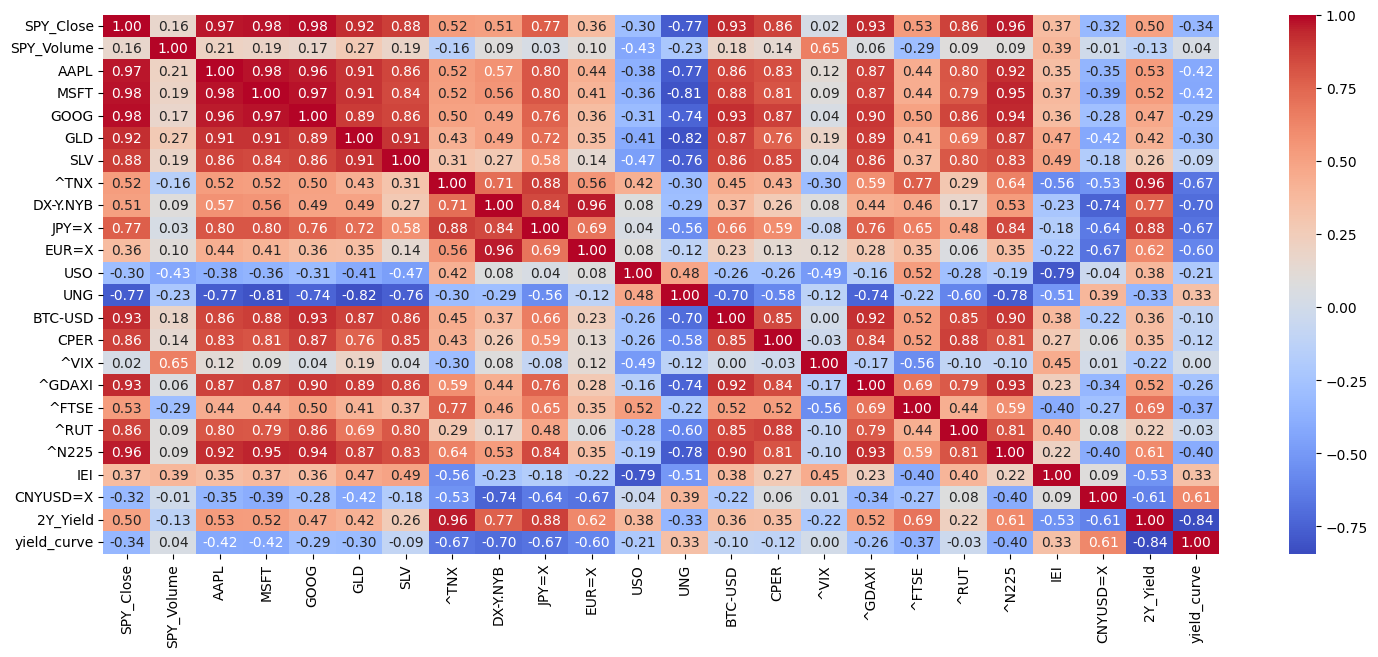

In [473]:
import seaborn as sns 
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 7))
sns.heatmap(combined_cleaned.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

# Indicators

# RSI

In [474]:
def RSI(series, period=14):
    delta = series.diff(1)
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    RS = gain / loss
    return 100 - (100 / (1 + RS))

In [475]:
combined_cleaned_add = combined_cleaned.copy()
combined_cleaned_add = pd.concat([combined_cleaned_add, add_later], axis=1)
combined_cleaned_add.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2084 entries, 2017-01-03 to 2025-04-16
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SPY_Close            2084 non-null   float64
 1   SPY_Volume           2084 non-null   int64  
 2   AAPL                 2084 non-null   float64
 3   MSFT                 2084 non-null   float64
 4   GOOG                 2084 non-null   float64
 5   GLD                  2084 non-null   float64
 6   SLV                  2084 non-null   float64
 7   ^TNX                 2084 non-null   float64
 8   DX-Y.NYB             2084 non-null   float64
 9   JPY=X                2084 non-null   float64
 10  EUR=X                2084 non-null   float64
 11  USO                  2084 non-null   float64
 12  UNG                  2084 non-null   float64
 13  BTC-USD              2084 non-null   float64
 14  CPER                 2084 non-null   float64
 15  ^VIX                

In [476]:
combined_cleaned_add['SPY_RSI'] = RSI(combined_cleaned_add['SPY_Close'], period=14)
combined_cleaned_add[['SPY_RSI']].tail(30)
combined_cleaned_add['RSI_rank'] = combined_cleaned_add['SPY_RSI'].rank(pct=True)
combined_cleaned_add['RSI_rank_2'] = combined_cleaned_add['SPY_RSI'].apply(lambda x: 1 if x > 70 else (0 if x < 30 else -1))

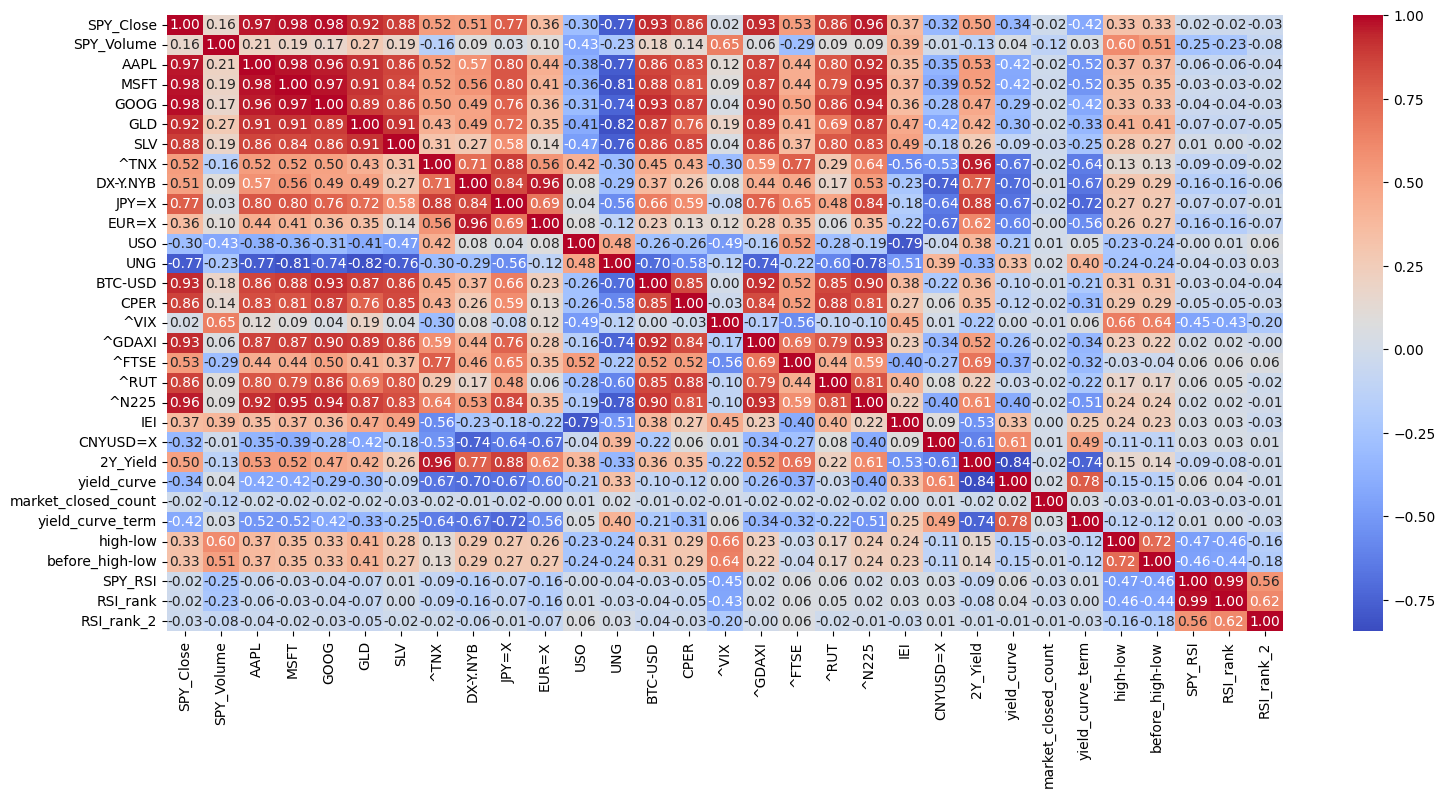

In [196]:
plt.figure(figsize=(18, 8))
sns.heatmap(combined_cleaned_add.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

# Add EMA

In [477]:
combined_cleaned_add['EMA_20'] = combined_cleaned_add['SPY_Close'].ewm(span=20, adjust=False).mean()
combined_cleaned_add['EMA_50'] = combined_cleaned_add['SPY_Close'].ewm(span=50, adjust=False).mean()
combined_cleaned_add['EMA_200'] = combined_cleaned_add['SPY_Close'].ewm(span=200, adjust=False).mean()

In [478]:
#combined_cleaned_add.info()
combined_cleaned_add['EMA_200'].tail(20)
# crorossing EMA:
combined_cleaned_add['EMA_20_50'] = np.where(combined_cleaned_add['EMA_20'] > combined_cleaned_add['EMA_50'], 1, 0)
combined_cleaned_add['EMA_50_200'] = np.where(combined_cleaned_add['EMA_50'] > combined_cleaned_add['EMA_200'], 1, 0)
# diff from EMA 50/200 by presantage
combined_cleaned_add['EMA_50_diff'] = ((combined_cleaned_add['SPY_Close'] - combined_cleaned_add['EMA_50']) / combined_cleaned_add['SPY_Close'])*100
combined_cleaned_add['EMA_200_diff'] = ((combined_cleaned_add['SPY_Close'] - combined_cleaned_add['EMA_200']) / combined_cleaned_add['SPY_Close'])*100


# Added columns:
EMA_20,EMA_50,EMA_200

EMA_20_50,EMA_50_200 : crossed

EMA_50_diff,EMA_200_diff : presantage diff

In [479]:
combined_cleaned_add[['EMA_20','EMA_50','EMA_200','EMA_20_50','EMA_50_200','EMA_50_diff','EMA_200_diff']].tail(30)

,EMA_20,EMA_50,EMA_200,EMA_20_50,EMA_50_200,EMA_50_diff,EMA_200_diff
Date,,,,,,,
2025-03-06,5943.561165,5970.607978,5709.913621,0,1,-4.044387,0.498498
2025-03-07,5927.050597,5962.748849,5710.513487,0,1,-3.336949,1.034396
2025-03-10,5897.289593,5949.094387,5709.558727,0,1,-5.958336,-1.692006
2025-03-11,5866.316282,5934.309110,5708.190678,0,1,-6.500983,-2.442914
2025-03-12,5840.886141,5921.171490,5707.107187,0,1,-5.748427,-1.925373
2025-03-13,5810.470320,5905.498883,5705.260548,0,1,-6.954224,-3.327716
2025-03-14,5794.134094,5895.045592,5704.600642,0,1,-4.541734,-1.164416
2025-03-17,5782.799429,5886.421063,5704.307303,0,1,-3.723286,-0.514301
2025-03-18,5766.786165,5875.763773,5703.415292,0,1,-4.650390,-1.580775


In [230]:
combined_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2084 entries, 2017-01-03 to 2025-04-16
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SPY_Close    2084 non-null   float64
 1   SPY_Volume   2084 non-null   int64  
 2   AAPL         2084 non-null   float64
 3   MSFT         2084 non-null   float64
 4   GOOG         2084 non-null   float64
 5   GLD          2084 non-null   float64
 6   SLV          2084 non-null   float64
 7   ^TNX         2084 non-null   float64
 8   DX-Y.NYB     2084 non-null   float64
 9   JPY=X        2084 non-null   float64
 10  EUR=X        2084 non-null   float64
 11  USO          2084 non-null   float64
 12  UNG          2084 non-null   float64
 13  BTC-USD      2084 non-null   float64
 14  CPER         2084 non-null   float64
 15  ^VIX         2084 non-null   float64
 16  ^GDAXI       2084 non-null   float64
 17  ^FTSE        2084 non-null   float64
 18  ^RUT         2084 non-null   f

In [480]:
combined_cleaned_add['SPY_RSI'].head(30)

Date
2017-01-03          NaN
2017-01-04          NaN
2017-01-05          NaN
2017-01-06          NaN
2017-01-09          NaN
2017-01-10          NaN
2017-01-11          NaN
2017-01-12          NaN
2017-01-13          NaN
2017-01-17          NaN
2017-01-18          NaN
2017-01-19          NaN
2017-01-20          NaN
2017-01-23    54.669773
2017-01-24    61.857468
2017-01-25    63.926955
2017-01-26    63.965540
2017-01-27    59.510150
2017-01-30    56.071596
2017-01-31    54.943062
2017-02-01    52.223722
2017-02-02    55.686728
2017-02-03    60.962463
2017-02-06    62.092032
2017-02-07    60.753161
2017-02-08    66.851614
2017-02-09    68.748748
2017-02-10    75.547185
2017-02-13    74.860734
2017-02-14    72.296202
Name: SPY_RSI, dtype: float64

# The abs value of stocks

In [481]:
combined_cleaned_add.info()
# saving the added indicators data
combined_cleaned_add.to_csv('combined_cleaned_add.csv', index=False)
combined_cleaned_add.to_pickle('combined_cleaned_add.pkl')

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2084 entries, 2017-01-03 to 2025-04-16
Data columns (total 38 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SPY_Close            2084 non-null   float64
 1   SPY_Volume           2084 non-null   int64  
 2   AAPL                 2084 non-null   float64
 3   MSFT                 2084 non-null   float64
 4   GOOG                 2084 non-null   float64
 5   GLD                  2084 non-null   float64
 6   SLV                  2084 non-null   float64
 7   ^TNX                 2084 non-null   float64
 8   DX-Y.NYB             2084 non-null   float64
 9   JPY=X                2084 non-null   float64
 10  EUR=X                2084 non-null   float64
 11  USO                  2084 non-null   float64
 12  UNG                  2084 non-null   float64
 13  BTC-USD              2084 non-null   float64
 14  CPER                 2084 non-null   float64
 15  ^VIX                

# Add gold silver ratio

In [770]:
combined_cleaned['GLD/SLV'] = combined_cleaned['GLD'] / combined_cleaned['SLV']
combined_cleaned['GLD/SLV'].tail(30)

Date
2025-03-06     9.035028
2025-03-07     9.070294
2025-03-10     9.139128
2025-03-11     8.983979
2025-03-12     8.945400
2025-03-13     8.950228
2025-03-14     8.962553
2025-03-17     8.981825
2025-03-18     9.074878
2025-03-19     9.141788
2025-03-20     9.204918
2025-03-21     9.276815
2025-03-24     9.254006
2025-03-25     9.106279
2025-03-26     9.113658
2025-03-27     9.002874
2025-03-28     9.163226
2025-03-31     9.297839
2025-04-01     9.388508
2025-04-02     9.368010
2025-04-03     9.914158
2025-04-04    10.329394
2025-04-07    10.085114
2025-04-08    10.140015
2025-04-09    10.170350
2025-04-10    10.337694
2025-04-11    10.206577
2025-04-14    10.082710
2025-04-15    10.125128
2025-04-16    10.331653
Name: GLD/SLV, dtype: float64

# Convert to presentage return

In [527]:
returns = combined_cleaned.pct_change()* 100
returns['^N225'] = returns['^N225'].fillna(0)
returns.head(10)


,SPY_Close,SPY_Volume,AAPL,MSFT,GOOG,GLD,SLV,^TNX,DX-Y.NYB,JPY=X,...,CPER,^VIX,^GDAXI,^FTSE,^RUT,^N225,IEI,CNYUSD=X,2Y_Yield,yield_curve
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
2017-01-04,0.572227,-0.109197,-0.111924,-0.447436,0.096670,0.353036,0.906738,0.081627,-0.494140,0.139575,...,2.463052,-7.782101,0.000599,0.164398,1.644828,0.000000,0.065267,-0.227011,1.639344,-1.463426
2017-01-05,-0.077067,0.429569,0.508548,0.000000,0.904813,1.551507,1.155329,-3.425770,-1.148978,-0.464051,...,-0.961538,-1.518990,0.005446,0.077884,-1.153501,-0.374962,0.301899,0.501070,-5.645161,-1.155105
2017-01-06,0.351696,-11.703848,1.114840,0.866778,1.527671,-0.737255,-0.761421,2.111484,0.689524,-1.577963,...,-0.060681,-2.999146,0.121445,0.205694,-0.339659,-0.339944,-0.276536,0.540076,4.273504,-0.000004
2017-01-09,-0.354859,-3.660894,0.915937,-0.318243,0.062026,0.823265,0.383628,-1.736975,-0.283703,1.635364,...,0.728603,2.120148,-0.301918,0.384179,-0.716023,0.000000,0.195741,-0.427897,-0.819672,-2.671123
2017-01-10,0.000000,13.070351,0.100839,-0.031922,-0.230588,0.426026,1.337580,0.126264,0.078487,-0.994452,...,2.712482,-0.605542,0.166980,0.520879,0.987855,-0.785895,0.016285,-0.276787,-1.652893,1.972558
2017-01-11,0.282964,-0.425209,0.537308,0.910216,0.387682,0.309323,-0.251414,-0.378313,-0.225471,-0.097425,...,-0.880291,-2.001737,0.542765,0.206171,0.175069,0.327595,0.000000,0.223950,0.840336,-1.597987
2017-01-12,-0.214481,-4.382248,-0.417516,-0.917851,-0.191849,0.361237,0.252048,-0.379739,-0.422480,-0.667980,...,2.605095,2.486676,-1.074429,0.026060,-0.890563,-1.187579,0.097685,-0.214828,-1.666667,0.940186
2017-01-13,0.184984,-10.834281,-0.176105,0.143721,0.188501,0.263362,0.188559,0.804746,-0.167734,-0.377068,...,1.500290,-2.686312,0.938627,0.622565,0.806726,0.797400,-0.154511,0.597552,2.542373,-0.931409


In [203]:

#returns = combined_cleaned.pct_change()* 100
#returns['000300.SS'].fillna(0)
#for col in combined_cleaned.columns:
#    if not col.endswith('_market_close') and f'{col}_market_close' in combined_cleaned.columns:
#        mask = combined_cleaned[f'{col}_market_close'] == 1
#        returns.loc[mask, col] = 0
#returns = returns.dropna()
#market_cols = [col for col in combined_cleaned.columns if col.endswith('_market_close')]
#combined_cleaned.drop(columns=market_cols, inplace=True)
#returns.drop(columns=market_cols, inplace=True)
#returns.tail(20)


In [528]:
#r= returns.copy()
#returns = pd.concat([returns,add_later],axis=1)
returns = returns.join(add_later, how='left')
returns.head()


,SPY_Close,SPY_Volume,AAPL,MSFT,GOOG,GLD,SLV,^TNX,DX-Y.NYB,JPY=X,...,^RUT,^N225,IEI,CNYUSD=X,2Y_Yield,yield_curve,market_closed_count,yield_curve_term,high-low,before_high-low
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000000,NaN,NaN,NaN,NaN,2,1.0,18.750000,NaN
2017-01-04,0.572227,-0.109197,-0.111924,-0.447436,0.096670,0.353036,0.906738,0.081627,-0.494140,0.139575,...,1.644828,0.000000,0.065267,-0.227011,1.639344,-1.463426,0,1.0,11.219971,18.750000
2017-01-05,-0.077067,0.429569,0.508548,0.000000,0.904813,1.551507,1.155329,-3.425770,-1.148978,-0.464051,...,-1.153501,-0.374962,0.301899,0.501070,-5.645161,-1.155105,0,1.0,11.050049,11.219971
2017-01-06,0.351696,-11.703848,1.114840,0.866778,1.527671,-0.737255,-0.761421,2.111484,0.689524,-1.577963,...,-0.339659,-0.339944,-0.276536,0.540076,4.273504,-0.000004,0,1.0,18.040039,11.050049
2017-01-09,-0.354859,-3.660894,0.915937,-0.318243,0.062026,0.823265,0.383628,-1.736975,-0.283703,1.635364,...,-0.716023,0.000000,0.195741,-0.427897,-0.819672,-2.671123,1,1.0,6.590088,18.040039


In [ ]:
#returns = returns.iloc[1:] # remove the first raw because its null

In [529]:
returns['SPY_Close'].min()


np.float64(-11.984055240393443)

# Add streak days 
Number of consecetive days down/up



In [530]:
# Step 1: Get the direction of return
direction = np.sign(returns['SPY_Close'].fillna(0))

# Step 2: Shift it down so current row gets info about previous days only
shifted_direction = direction.shift(1).fillna(0)

# Step 3: Build the streak
streak = []
count = 0

for change in shifted_direction:
    if change == 0:
        count = 0
    elif change > 0:
        count = count + 1 if count >= 0 else 1
    else:
        count = count - 1 if count <= 0 else -1
    streak.append(count)

# Step 4: Add to DataFrame
returns['SPY_Streak'] = streak

In [531]:

returns = returns.rename(columns={'SPY_Close':'SPY_return'}) #rename the column
returns.head(10)

,SPY_return,SPY_Volume,AAPL,MSFT,GOOG,GLD,SLV,^TNX,DX-Y.NYB,JPY=X,...,^N225,IEI,CNYUSD=X,2Y_Yield,yield_curve,market_closed_count,yield_curve_term,high-low,before_high-low,SPY_Streak
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,NaN,2,1.0,18.750000,NaN,0
2017-01-04,0.572227,-0.109197,-0.111924,-0.447436,0.096670,0.353036,0.906738,0.081627,-0.494140,0.139575,...,0.000000,0.065267,-0.227011,1.639344,-1.463426,0,1.0,11.219971,18.750000,0
2017-01-05,-0.077067,0.429569,0.508548,0.000000,0.904813,1.551507,1.155329,-3.425770,-1.148978,-0.464051,...,-0.374962,0.301899,0.501070,-5.645161,-1.155105,0,1.0,11.050049,11.219971,1
2017-01-06,0.351696,-11.703848,1.114840,0.866778,1.527671,-0.737255,-0.761421,2.111484,0.689524,-1.577963,...,-0.339944,-0.276536,0.540076,4.273504,-0.000004,0,1.0,18.040039,11.050049,-1
2017-01-09,-0.354859,-3.660894,0.915937,-0.318243,0.062026,0.823265,0.383628,-1.736975,-0.283703,1.635364,...,0.000000,0.195741,-0.427897,-0.819672,-2.671123,1,1.0,6.590088,18.040039,1
2017-01-10,0.000000,13.070351,0.100839,-0.031922,-0.230588,0.426026,1.337580,0.126264,0.078487,-0.994452,...,-0.785895,0.016285,-0.276787,-1.652893,1.972558,0,1.0,14.000000,6.590088,-1
2017-01-11,0.282964,-0.425209,0.537308,0.910216,0.387682,0.309323,-0.251414,-0.378313,-0.225471,-0.097425,...,0.327595,0.000000,0.223950,0.840336,-1.597987,0,1.0,14.489990,14.000000,0
2017-01-12,-0.214481,-4.382248,-0.417516,-0.917851,-0.191849,0.361237,0.252048,-0.379739,-0.422480,-0.667980,...,-1.187579,0.097685,-0.214828,-1.666667,0.940186,0,1.0,17.530029,14.489990,1
2017-01-13,0.184984,-10.834281,-0.176105,0.143721,0.188501,0.263362,0.188559,0.804746,-0.167734,-0.377068,...,0.797400,-0.154511,0.597552,2.542373,-0.931409,0,1.0,7.169922,17.530029,-1


# Absolute change

In [532]:
# Step 1: Convert percent returns to multipliers
multipliers = 1 + (returns['SPY_return'].fillna(0) / 100)
streaks = returns['SPY_Streak'].fillna(0)

# Step 2: Initialize result list
abs_changes = []

for i in range(len(returns)):
    streak = streaks.iloc[i]

    if abs(streak) <= 1:
        # Use previous day's return as-is
        abs_changes.append(returns['SPY_return'].iloc[i - 1] if i > 0 else np.nan)
    else:
        length = abs(int(streak))
        start_idx = i - length
        if start_idx < 0:
            abs_changes.append(np.nan)
        else:
            # Compute cumulative return from previous 'length' days
            cumulative_return = multipliers.iloc[start_idx:i].prod()
            abs_changes.append((cumulative_return - 1) * 100)

# Step 3: Assign the result
returns['SPY_AbsChange'] = abs_changes


In [533]:
returns.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2084 entries, 2017-01-03 to 2025-04-16
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SPY_return           2083 non-null   float64
 1   SPY_Volume           2083 non-null   float64
 2   AAPL                 2083 non-null   float64
 3   MSFT                 2083 non-null   float64
 4   GOOG                 2083 non-null   float64
 5   GLD                  2083 non-null   float64
 6   SLV                  2083 non-null   float64
 7   ^TNX                 2083 non-null   float64
 8   DX-Y.NYB             2083 non-null   float64
 9   JPY=X                2083 non-null   float64
 10  EUR=X                2083 non-null   float64
 11  USO                  2083 non-null   float64
 12  UNG                  2083 non-null   float64
 13  BTC-USD              2083 non-null   float64
 14  CPER                 2083 non-null   float64
 15  ^VIX                

In [534]:
returns = returns.iloc[2:] # remove the first 2 raws because its null
returns.head()

,SPY_return,SPY_Volume,AAPL,MSFT,GOOG,GLD,SLV,^TNX,DX-Y.NYB,JPY=X,...,IEI,CNYUSD=X,2Y_Yield,yield_curve,market_closed_count,yield_curve_term,high-low,before_high-low,SPY_Streak,SPY_AbsChange
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-05,-0.077067,0.429569,0.508548,0.000000,0.904813,1.551507,1.155329,-3.425770,-1.148978,-0.464051,...,0.301899,0.501070,-5.645161,-1.155105,0,1.0,11.050049,11.219971,1,0.572227
2017-01-06,0.351696,-11.703848,1.114840,0.866778,1.527671,-0.737255,-0.761421,2.111484,0.689524,-1.577963,...,-0.276536,0.540076,4.273504,-0.000004,0,1.0,18.040039,11.050049,-1,-0.077067
2017-01-09,-0.354859,-3.660894,0.915937,-0.318243,0.062026,0.823265,0.383628,-1.736975,-0.283703,1.635364,...,0.195741,-0.427897,-0.819672,-2.671123,1,1.0,6.590088,18.040039,1,0.351696
2017-01-10,0.000000,13.070351,0.100839,-0.031922,-0.230588,0.426026,1.337580,0.126264,0.078487,-0.994452,...,0.016285,-0.276787,-1.652893,1.972558,0,1.0,14.000000,6.590088,-1,-0.354859
2017-01-11,0.282964,-0.425209,0.537308,0.910216,0.387682,0.309323,-0.251414,-0.378313,-0.225471,-0.097425,...,0.000000,0.223950,0.840336,-1.597987,0,1.0,14.489990,14.000000,0,0.000000


In [535]:
r= returns.copy()
r.reset_index( inplace=True) # reset the index
r.rename(columns={'Date':'ds'}, inplace=True) # rename the column
r['ds'].head()

0   2017-01-05
1   2017-01-06
2   2017-01-09
3   2017-01-10
4   2017-01-11
Name: ds, dtype: datetime64[ns]

In [536]:

returns.reset_index( inplace=True) # reset the index
returns.rename(columns={'Date':'ds'}, inplace=True) # rename the column
returns['ds'].head()

0   2017-01-05
1   2017-01-06
2   2017-01-09
3   2017-01-10
4   2017-01-11
Name: ds, dtype: datetime64[ns]

In [537]:

returns['ds'].head()
returns['day'] = returns['ds'].dt.day
returns['month'] = returns['ds'].dt.month

In [538]:
returns = returns.dropna()

In [518]:
from scipy.signal import argrelextrema
spy_zones = SPY.copy()

# Use N = window size to define "local"
N = 10

# Find local maxima (resistance) and minima (support)
spy_zones['local_max'] = spy_zones['SPY_Close'].iloc[argrelextrema(spy_zones['SPY_Close'].values, np.greater_equal, order=N)[0]]
spy_zones['local_min'] = spy_zones['SPY_Close'].iloc[argrelextrema(spy_zones['SPY_Close'].values, np.less_equal, order=N)[0]]


# Define zone precision (e.g., $5 buckets)
zone_precision = 100
support_levels = spy_zones['local_min'].dropna().round(-int(np.log10(zone_precision)))
resistance_levels = spy_zones['local_max'].dropna().round(-int(np.log10(zone_precision)))

support_zones = support_levels.value_counts().loc[lambda x: x > 1].index.tolist()
resistance_zones = resistance_levels.value_counts().loc[lambda x: x > 1].index.tolist()

In [519]:
# define your margins
margin_sup = 50.0    # dollars above support to trigger 1
margin_res = 50.0    # dollars below resistance to trigger -1

def support_signal(price):
    # compute (distance, support) for only those supports below or equal to price
    diffs = [(price - s, s) for s in support_zones if s <= price]
    if not diffs:
        return 0
    # pick the smallest positive distance
    nearest_diff, nearest_sup = min(diffs, key=lambda x: x[0])
    return 1 if nearest_diff <= margin_sup else 0

def resistance_signal(price):
    # compute (distance, resistance) for only those resistances above or equal to price
    diffs = [(r - price, r) for r in resistance_zones if r >= price]
    if not diffs:
        return 0
    nearest_diff, nearest_res = min(diffs, key=lambda x: x[0])
    return -1 if nearest_diff <= margin_res else 0

# apply to your DataFrame
spy_zones['SUPPORT_Signal']    = spy_zones['SPY_Close'].apply(support_signal)
spy_zones['RESISTANCE_Signal'] = spy_zones['SPY_Close'].apply(resistance_signal)

# quick check
print(spy_zones[['SPY_Close','SUPPORT_Signal','RESISTANCE_Signal']].tail(60))


              SPY_Close  SUPPORT_Signal  RESISTANCE_Signal
Date                                                      
2025-01-22  6086.370117               0                 -1
2025-01-23  6118.709961               0                  0
2025-01-24  6101.240234               0                  0
2025-01-27  6012.279785               0                  0
2025-01-28  6067.700195               0                 -1
2025-01-29  6039.310059               0                  0
2025-01-30  6071.169922               0                 -1
2025-01-31  6040.529785               0                  0
2025-02-03  5994.569824               0                  0
2025-02-04  6037.879883               0                  0
2025-02-05  6061.479980               0                 -1
2025-02-06  6083.569824               0                 -1
2025-02-07  6025.990234               0                  0
2025-02-10  6066.439941               0                 -1
2025-02-11  6068.500000               0                 

In [520]:
spy_zones.reset_index(inplace=True)
spy_zones.rename(columns={'Date':'ds'}, inplace=True)


In [521]:
returns = returns.merge(spy_zones[['ds','SUPPORT_Signal','RESISTANCE_Signal']], on='ds', how='left')


In [522]:
returns.info()
print(returns.columns.to_list())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2082 entries, 0 to 2081
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ds                   2082 non-null   datetime64[ns]
 1   SPY_return           2082 non-null   float64       
 2   SPY_Volume           2082 non-null   float64       
 3   AAPL                 2082 non-null   float64       
 4   MSFT                 2082 non-null   float64       
 5   GOOG                 2082 non-null   float64       
 6   GLD                  2082 non-null   float64       
 7   SLV                  2082 non-null   float64       
 8   ^TNX                 2082 non-null   float64       
 9   DX-Y.NYB             2082 non-null   float64       
 10  JPY=X                2082 non-null   float64       
 11  EUR=X                2082 non-null   float64       
 12  USO                  2082 non-null   float64       
 13  UNG                  2082 non-nul

In [523]:
returns['yest_support_signal'] = returns['SUPPORT_Signal'].shift(1)
returns['yest_resistance_signal'] = returns['RESISTANCE_Signal'].shift(1)
returns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2082 entries, 0 to 2081
Data columns (total 37 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   ds                      2082 non-null   datetime64[ns]
 1   SPY_return              2082 non-null   float64       
 2   SPY_Volume              2082 non-null   float64       
 3   AAPL                    2082 non-null   float64       
 4   MSFT                    2082 non-null   float64       
 5   GOOG                    2082 non-null   float64       
 6   GLD                     2082 non-null   float64       
 7   SLV                     2082 non-null   float64       
 8   ^TNX                    2082 non-null   float64       
 9   DX-Y.NYB                2082 non-null   float64       
 10  JPY=X                   2082 non-null   float64       
 11  EUR=X                   2082 non-null   float64       
 12  USO                     2082 non-null   float64 

# export the data

In [539]:
combined_cleaned.to_pickle('Raw_stocks_data')
returns.to_pickle('data_for_model')
#returns.to_csv('data_for_model.csv',index=False)

In [596]:
returns.head() # the file with events and date as ds 

,SPY_return,SPY_Volume,high-low,before_high-low,AAPL,MSFT,GOOG,GLD,SLV,^TNX,...,2Y_Yield,yield_curve,market_closed_count,yield_curve_term,ds,SPY_Streak,SPY_AbsChange,month,day,GLD/SLV
2,-0.281178,-27.235288,-61.424082,32.677733,0.796800,0.258498,2.465741,1.048950,0.593826,1.286354,...,-3.164557,35.096157,0,1.0,2020-01-07,1,0.381509,7,1,1.766425
3,0.532975,68.647090,139.226323,-61.424082,-0.470306,-0.911765,-0.062415,0.393515,1.357730,0.883492,...,0.653595,2.135243,0,1.0,2020-01-08,-1,-0.281178,8,1,0.289833
4,0.678054,-29.024687,-61.092362,139.226323,1.608634,1.592805,0.788053,-0.750152,-1.397785,2.572519,...,0.000000,16.376281,0,1.0,2020-01-09,1,0.532975,9,1,0.536672
5,-0.287784,9.398989,86.771727,-61.092362,2.124099,1.249292,1.104436,-0.565165,-1.240407,-0.853784,...,2.597403,-16.766443,0,1.0,2020-01-10,2,1.214643,10,1,0.455629
6,0.687757,-11.206069,-9.734636,86.771727,0.226054,-0.462695,0.697280,0.602619,1.016747,-1.776103,...,0.000000,-11.870499,0,1.0,2020-01-13,-1,-0.287784,13,1,0.592693


In [284]:
returns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2082 entries, 0 to 2081
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ds                   2082 non-null   datetime64[ns]
 1   SPY_return           2082 non-null   float64       
 2   SPY_Volume           2082 non-null   float64       
 3   AAPL                 2082 non-null   float64       
 4   MSFT                 2082 non-null   float64       
 5   GOOG                 2082 non-null   float64       
 6   GLD                  2082 non-null   float64       
 7   SLV                  2082 non-null   float64       
 8   ^TNX                 2082 non-null   float64       
 9   DX-Y.NYB             2082 non-null   float64       
 10  JPY=X                2082 non-null   float64       
 11  EUR=X                2082 non-null   float64       
 12  USO                  2082 non-null   float64       
 13  UNG                  2082 non-nul

In [67]:
print(SPY.iloc[500:530]) # there is a problem with the spy data

             SPY_Close  SPY_Volume  high-low  before_high-low  \
Date                                                            
2018-12-28  224.750336   153100200  4.490468         8.463844   
2018-12-31  226.718887   144299400  2.467492         4.490468   
2019-01-02  226.954712   126925200  4.771701         2.467492   
2019-01-03  221.538971   144140700  4.445121         4.771701   
2019-01-04  228.959579   142628800  5.388567         4.445121   
2019-01-07  230.764862   103139100  3.864522         5.388567   
2019-01-08  232.932953   102512600  3.002717         3.864522   
2019-01-09  234.021561    95006600  2.467492         3.002717   
2019-01-10  234.847153    96823900  3.320231         2.467492   
2019-01-11  234.937836    73858100  1.796198         3.320231   
2019-01-14  233.504486    70908200  1.714529         1.796198   
2019-01-15  236.180664    85208300  2.621723         1.714529   
2019-01-16  236.752167    77636700  1.242813         2.621723   
2019-01-17  238.548294   

In [286]:

def find_price_areas(df, bin_width=5, min_touches=5):
    """
    Find support and resistance areas based on price ranges (5-10 dollars wide)
    """
    min_price = df['SPY_Close'].min()
    max_price = df['SPY_Close'].max()

    # Create bins every 5 dollars
    bins = np.arange(min_price - bin_width, max_price + bin_width, bin_width)
    
    # Assign each close price to a bin
    df['price_bin'] = pd.cut(df['SPY_Close'], bins)

    # Count how many times each bin was hit
    bin_counts = df['price_bin'].value_counts().sort_index()

    # Select only bins that were touched enough times
    significant_bins = bin_counts[bin_counts >= min_touches].index

    # Extract (low, high) of each important bin
    areas = [(interval.left, interval.right) for interval in significant_bins]

    return areas

In [287]:
areas = find_price_areas(SPY, bin_width=100, min_touches=50)

In [288]:
#print(len(areas))
print(areas)

[(np.float64(2337.4), np.float64(2437.4)), (np.float64(2437.4), np.float64(2537.4)), (np.float64(2537.4), np.float64(2637.4)), (np.float64(2637.4), np.float64(2737.4)), (np.float64(2737.4), np.float64(2837.4)), (np.float64(2837.4), np.float64(2937.4)), (np.float64(2937.4), np.float64(3037.4)), (np.float64(3737.4), np.float64(3837.4)), (np.float64(3837.4), np.float64(3937.4)), (np.float64(3937.4), np.float64(4037.4)), (np.float64(4037.4), np.float64(4137.4)), (np.float64(4137.4), np.float64(4237.4)), (np.float64(4237.4), np.float64(4337.4)), (np.float64(4337.4), np.float64(4437.4)), (np.float64(4437.4), np.float64(4537.4)), (np.float64(4537.4), np.float64(4637.4))]


# Add support and resistence

In [493]:
from scipy.signal import argrelextrema
spy_zones = SPY.copy()

# Use N = window size to define "local"
N = 10

# Find local maxima (resistance) and minima (support)
spy_zones['local_max'] = spy_zones['SPY_Close'].iloc[argrelextrema(spy_zones['SPY_Close'].values, np.greater_equal, order=N)[0]]
spy_zones['local_min'] = spy_zones['SPY_Close'].iloc[argrelextrema(spy_zones['SPY_Close'].values, np.less_equal, order=N)[0]]


# Define zone precision (e.g., $5 buckets)
zone_precision = 100
support_levels = spy_zones['local_min'].dropna().round(-int(np.log10(zone_precision)))
resistance_levels = spy_zones['local_max'].dropna().round(-int(np.log10(zone_precision)))

support_zones = support_levels.value_counts().loc[lambda x: x > 1].index.tolist()
resistance_zones = resistance_levels.value_counts().loc[lambda x: x > 1].index.tolist()


In [317]:
print(resistance_zones)

[2900.0, 6100.0, 2800.0, 3000.0, 4200.0, 4600.0]


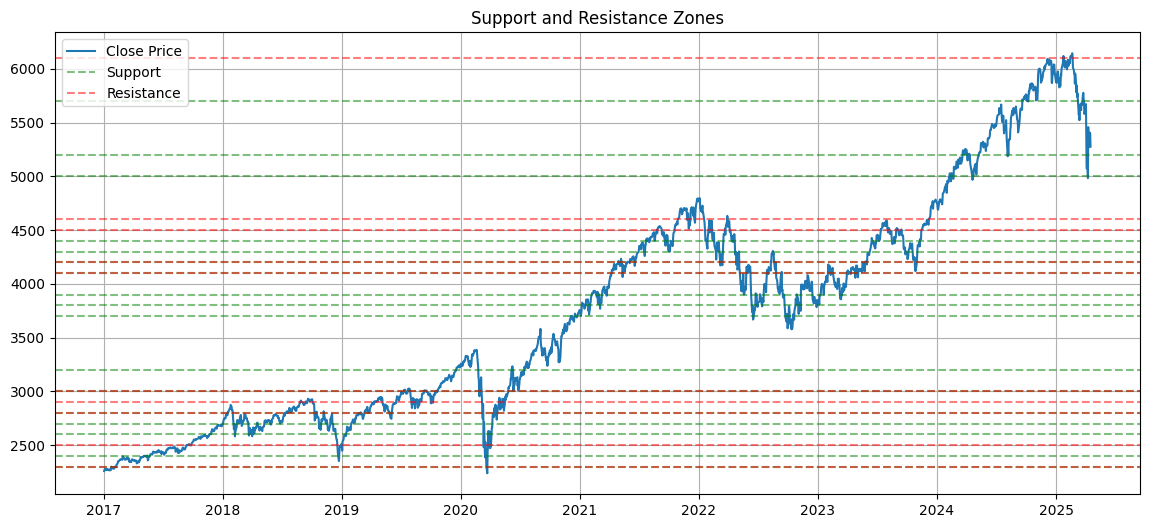

In [494]:
plt.figure(figsize=(14, 6))
plt.plot(spy_zones['SPY_Close'], label='Close Price')

for level in support_zones:
    plt.axhline(y=level, color='green', linestyle='--', alpha=0.5, label='Support' if 'Support' not in plt.gca().get_legend_handles_labels()[1] else "")
for level in resistance_zones:
    plt.axhline(y=level, color='red', linestyle='--', alpha=0.5, label='Resistance' if 'Resistance' not in plt.gca().get_legend_handles_labels()[1] else "")

plt.title('Support and Resistance Zones')
plt.legend()
plt.grid(True)
plt.show()


In [427]:
# define your margins
margin_sup = 50.0    # dollars above support to trigger 1
margin_res = 50.0    # dollars below resistance to trigger -1

def support_signal(price):
    # compute (distance, support) for only those supports below or equal to price
    diffs = [(price - s, s) for s in support_zones if s <= price]
    if not diffs:
        return 0
    # pick the smallest positive distance
    nearest_diff, nearest_sup = min(diffs, key=lambda x: x[0])
    return 1 if nearest_diff <= margin_sup else 0

def resistance_signal(price):
    # compute (distance, resistance) for only those resistances above or equal to price
    diffs = [(r - price, r) for r in resistance_zones if r >= price]
    if not diffs:
        return 0
    nearest_diff, nearest_res = min(diffs, key=lambda x: x[0])
    return -1 if nearest_diff <= margin_res else 0

# apply to your DataFrame
spy_zones['SUPPORT_Signal']    = spy_zones['SPY_Close'].apply(support_signal)
spy_zones['RESISTANCE_Signal'] = spy_zones['SPY_Close'].apply(resistance_signal)

# quick check
print(spy_zones[['SPY_Close','SUPPORT_Signal','RESISTANCE_Signal']].tail(60))


              SPY_Close  SUPPORT_Signal  RESISTANCE_Signal
Date                                                      
2025-01-22  6086.370117               0                 -1
2025-01-23  6118.709961               0                  0
2025-01-24  6101.240234               0                  0
2025-01-27  6012.279785               0                  0
2025-01-28  6067.700195               0                 -1
2025-01-29  6039.310059               0                  0
2025-01-30  6071.169922               0                 -1
2025-01-31  6040.529785               0                  0
2025-02-03  5994.569824               0                  0
2025-02-04  6037.879883               0                  0
2025-02-05  6061.479980               0                 -1
2025-02-06  6083.569824               0                 -1
2025-02-07  6025.990234               0                  0
2025-02-10  6066.439941               0                 -1
2025-02-11  6068.500000               0                 

In [526]:
spy_zones.to_pickle('spy_s_r_zones.pkl')

## Draft for support and resistence areas:

In [540]:
import numpy as np
import pandas as pd
from scipy.signal import argrelextrema

def find_price_areas_multi(df, price_cols, bin_width=5, min_touches=5):
    """
    Finds $-width zones touched by any of the given price columns.
    price_cols: list like ['High','Low','Close'].
    """
    # 1) stack all values from the price columns into one series
    all_prices = pd.concat([df[col] for col in price_cols], ignore_index=True)
    
    mn, mx = all_prices.min(), all_prices.max()
    bins = np.arange(mn - bin_width, mx + bin_width + 1e-9, bin_width)
    
    # 2) assign to bins and count
    bin_labels = pd.cut(all_prices, bins)
    counts = bin_labels.value_counts().sort_index()
    
    # 3) keep bins with enough “touches”
    good_bins = counts[counts >= min_touches].index
    
    # 4) return list of (low, high) tuples
    return [(interval.left, interval.right) for interval in good_bins]


def add_area_signal(df, areas, margin=1.0, signal_col='Area_Signal'):
    """
    Marks each row based on its Close:
     +1 if Close within [high−margin, high+margin]
     -1 if Close within [low −margin, low +margin]
      0 otherwise
    """
    conditions, choices = [], []
    for low, high in areas:
        # resistance
        conditions.append((df['SPY_Close'] >= high - margin) & (df['SPY_Close'] <= high + margin))
        choices.append(1)
        # support
        conditions.append((df['SPY_Close'] >= low  - margin) & (df['SPY_Close'] <= low  + margin))
        choices.append(-1)
    
    df[signal_col] = np.select(conditions, choices, default=0)
    return df



# Detect zones touching any of High/Low/Close
areas = find_price_areas_multi(SPY, price_cols=['SPY_High','SPY_Low','SPY_Close'],
                               bin_width=70, min_touches=40)

print("Zones ($5 wide):", areas)

# Add the -1/0/+1 feature based on Close’s proximity to those zones
#df = add_area_signal(df, areas, margin=1.0)

# Inspect
#print(df[['High','Low','Close','Area_Signal']].tail(10))
print(len(areas))

KeyError: 'SPY_High'

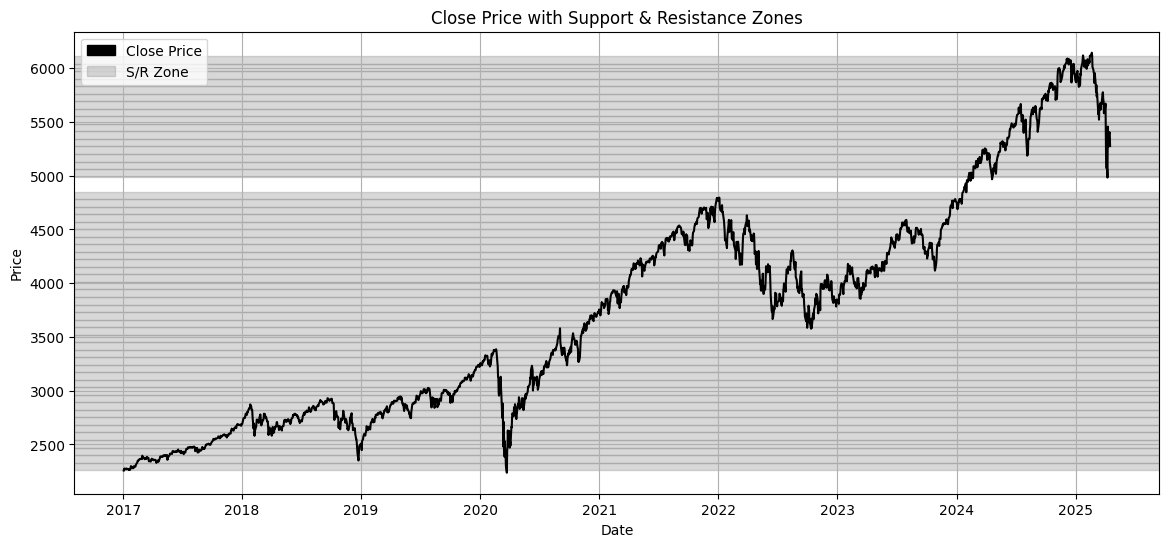

In [410]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# — assume df has a Date index and a 'Close' column —
# — and you have your list of zones as (low, high) tuples in “areas” —

# Example:
# areas = [(410, 415), (420, 425), (430, 435)]

plt.figure(figsize=(14, 6))
plt.plot(SPY.index, SPY['SPY_Close'], color='black', label='Close Price')

# draw each zone as a translucent band
for low, high in areas:
    plt.axhspan(low, high,
                color='gray',
                alpha=0.3)

# create custom legend entries
support_patch    = mpatches.Patch(color='gray', alpha=0.3, label='S/R Zone')
price_line_patch = mpatches.Patch(color='black', label='Close Price')

plt.legend(handles=[price_line_patch, support_patch])
plt.title('Close Price with Support & Resistance Zones')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()
